Método de Box-Muller para generar una V.A. con distribución normal.

1) Explique el desarrollo teórico del método

2) Desarrolle un programa para generar variables aleatorias normales utilizando el método de Box-Muller

3) Mejorar la eficiencia del código generando pares de números aleatorios (X,Y) dentro del cı́rculo de radio unidad.

1) El método de Box-Muller consiste en generar variables aleatorias con distribución normal. En el caso de la distribución normal no puede realizarse el metodo de la transformación inversa, pues la funcion que buscamos no es invertible. Asimismo tampoco se puede usar el metodo de rechazo, pues no se puede acotar los valores de las variables a una caja, porque van de $-\infty a +\infty$ (Zandivares 2015, Apuntes de Astrometría).

El método de Box-Muller permite la generación de pares de números aleatorios independientes con distribución normal estándar a partir de 2 variables aleatorias uniformes distribuidas en [0,1].

Desarrollo teórico - Método Box Muller tradicional

Sean X e Y dos variables aleatorias normales estándar. Se pide también que sean independientes, así su función de densidad de probabilidad conjunta satisface:
$$f(X,Y)=f(X).f(Y)$$

Reemplazando con las funciones de densidades de probabilidad de cada una, se obtiene:
$$f(X,Y)=\frac{e^{-(X^2+Y^2)/2}}{2\pi}$$

Se definen 2 variables aleatorias nuevas e independientes $R^2$ y $\theta$ tal que sigan el siguiente cambio de variables:
$$R^2=X^2+Y^2$$$$tan(\theta)=\frac{Y}{X}$$

Se quiere encontrar la densidad de probabilidad conjunta de las variables $R^2$ y $\theta$ y para ello se utiliza el Teorema de cambio de varibles aleatorias, ya que se conoce la f(X,Y) y las funciones que relacionan las 2 variables.

Realizando la integral correspondiente se llega a que:
$$f(R^2,\theta)=\frac{1}{2\pi}.\frac{e^{-R^2/2}}{2}$$

Al pedir que $R^2$ y $\theta$ sean independientes, se tiene que:
$$f(R^2,\theta)=f(R^2).f(\theta)$$

Luego, se determina que $f(R^2,\theta)$ equivale al producto de una densidad de probabilidad exponencial con media 2 y una distribución uniforme en $[0,2\pi]$.

Por lo tanto,
$$f(R^2)=\frac{e^{-R^2/2}}{2}$$$$f(\theta)=\frac{1}{2\pi}$$

Entonces, se ve que si se sortean dos variables X e Y con distribución normal estándar y se realiza un cambio de variables, se llega a 2 nuevas variables, una con distribución uniforme y la otra con una exponencial. Si se realiza el camino inverso, a partir de estas últimas variables es posible conseguir 2 variables independientes con distribución normal estándar, usando:
$$X=R.cos(\theta)$$$$Y=R.sen(\theta)$$

Se utiliza este método, para encontrar X e Y usando la generación de las variables $R^2$ y $\theta$ cuyas distribuciones son más simples que de construir que la gaussiana.


In [5]:
import random
import math
from scipy import stats
import seaborn as sns

In [6]:
sns.set()

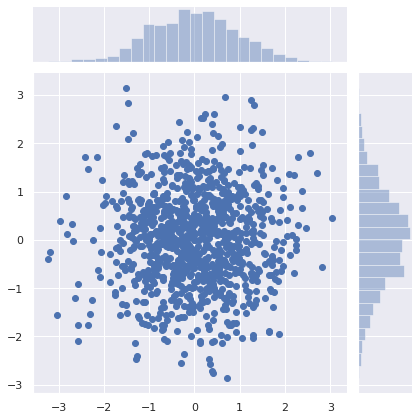

In [7]:
listax=[]  #definimos dos listas, que son las que usaremos como ejes x e y respectivamente
listay=[]
for i in range(1000): 
    u1=random.random() #sorteamos las variables aleatorias
    u2=random.random()
    x=math.sqrt(-2*math.log(u1))*math.cos(2*math.pi*u2) #Hacemos la transformacion desctipta en el desarrollo teorico
    y=math.sqrt(-2*math.log(u1))*math.sin(2*math.pi*u2)
    listax.append(x) #Guardamos cada variable en su correspondiente lista
    listay.append(y)
sns.jointplot(listax, listay, kind='scatter'); #Graficamos la distribución en el plano y un histograma de cada variable.

Método Box Muller mejorado

Para mejorar la eficiencia del código generando pares aleatorios dentro del círculo de radio unidad se considera el triángulo de lados definido por la hipotenusa R y el ángulo $\theta$, de lados $V_1$ y $V_2$.

Primero, se generan números aleatorios distribuidos uniformemente en el intervalo [-1,1]. Para ello, sean $U_1$ y $U_2$ dos varibles uniformes en el intervalo [0,1], se puede obtener las variables $V_1$ y $V_2$ uniformes en el intervalo [-1,1] de la forma:
$$V_1=2.U_1-1$$$$V_2=2.U_2-1$$

Para obetener que los pares estén distribuidos de forma uniforme dentro del círculo de radio unidad se debe pedir: $R^2=V_1^2+V_2^2\le1$

Escribiendo a $\theta$ de la siguiente forma: $$cos(\theta)=\frac{V_1}{R}$$ (Ec 2) $$sen(\theta)=\frac{V_2}{R}$$

Se reescriben las ecuaciones para X e Y (Ec 1): Utilizando a S como la variable aleatoria uniforme en [0,1] en vez de $U_1$ y usando (Ec 2) para el seno y coseno de $\theta$
$$X=\sqrt{\frac{-2log(1-s)}{S}}.V_1$$

(Ec 3) $$Y=\sqrt{\frac{-2log(1-s)}{S}}.V_2$$

(S.M. Ross 1999, Simulación) 

776


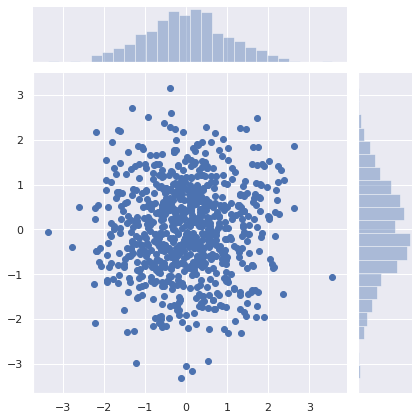

In [8]:
listax=[]
listay=[]#Del mismo modo que antes se definen las listas de los ejes, en este caso definimos una nueva lista
listas=[]#para contar la cantidad de puntos conservados
for i in range(1000):
    u1=random.random()
    u2=random.random()
    v1=2*u1-1 #Hacemos la transformacion pertinente para lograr una VA en [-1,1]
    v2=2*u2-1
    s=v1**2+v2**2 #definimos s, y vemos que sea menor o igual a 1
    if s<=1:
        X=math.sqrt(-2*math.log(1-s)/s)*v1
        Y=math.sqrt(-2*math.log(1-s)/s)*v2
        listax.append(X)
        listay.append(Y)
        listas.append(s) #Contamos la cantidad de s conservaods, si no se cumple s<=1 se descarta
print(len(listas)) #Vemos cuantos puntos se conservaron
sns.jointplot(listax, listay, kind='scatter');

Conclusiones

En este ejercicio se vio que se puede usar la transformación de Box-Muller para generar 2 variables aleatorias independientes con una distribución normal estándar. Primero se explicó el trasfondo teórico, y luego se implementó en un programa.

Por último se buscó mejorar el metódo de Box Muller disminuyendo el costo computacional. con este método mejorado tambien se pudo obtener la distribución deseada.
